In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
features = heart_disease.data.features
target = heart_disease.data.targets

data = pd.concat([features, target], axis=1)

# **Objectif :** Prédire si un individu aura une maladie cardiaque avec f1>80%


# 1. Exploration des données 

## Checklist

### Analyse de forme
- **Variable target :** 'num' (5 valeurs), présence et gravité de la maladie cardiaque, regroupement en 2 classes : 0 pas de présence et 1 présence
- **Nombre de lignes/colonnes :** 303 lignes et 14 colonnes
- **Type des variables :** 11 variables discètes et 3 variables continues (les données ont été encodées donc il y a des variables catégorielles cachées)
- **Analyse des variables manquantes :** 4 NaN sur la colonne 'ca' et 2 NaN sur la colonne 'thal'

### Analyse de fond
- **Analyse de la variable target :** 'num' 0 (rien) : 54%, 1 : 18 %, 2 : 12%, 3 : 12%, 4 : 4% et avec regroupement : 0 54% et 1 46%

En gras les variables qualitatives
- **Signification des variables :** 
    - 'age'
    - **'sexe'**
    - **'cp'** : type de douleur toracique (1 typique à l'angine, 2 non typique à l'angine, 3 non lié à l'angine, 4 rien)
    - 'trestbps' : pression artérielle au repos (en millimètres de mercure, mm Hg)
    - 'chol' : cholestérol (en milligrammes par décilitre, mg/dl)
    - **'fbs'** : glycémie à jeun > 120 mg/dl (1/0)
    - **'restecg'** : résultats de l'électrocardiogramme au repos (0 rien, 1 diminution du flux sanguin vers le coeur, 2 hypertrophie ventriculaire)
    - 'thalach' : fréquence cardiaque maximale atteinte (en bpm)
    - **'exang'** : angine induite par l'exercice (1/0)
    - 'oldpeak' : dépression du segment ST (en mm)
    - **'slope'** : forme de la pente du segment ST (0 pente ascendante, 1 pente plate, 2 pente descendante)
    - 'ca' : nombre d'artères bouchées (0-3)
    - **'thal'** : circulation sanguine dans le coeur (3 ok, 6 indique des zones abimées même au repos, 7 indique des zones abimées mais ok au repos)
- **Visualisation des variables :**
    - données continues : Seulement oldpeak, distribution asymétrique, beaucoup de valeur en 0
    - données entières : les données semblent suivre une distribution normale sauf pour le nombre d'artères bouchées avec plus de valeur en 0
    - données qualitatives : 66% d'hommes, 3/4 des patients n'ont pas de douleurs toraciques ou bien ne sont pas liées à une angine,  1/8 des patients ont plus de 120 mg/dl de glycémie à jeun (diabète!), électrocardiogramme 50% rien et 48% hypertrophie ventriculaire, 33% des patients ont une angine induite par l'exercice, plus de 50% des patients montrent des signes préoccupants au niveau de la forme de la pente du segment ST, un peu moins de 50% des patients ont des zones de circulation sanguine abimées (au moins lors de l'exercice) 
    
    Les données quantitatives sont à normaliser
- **Relations variables/target :**
    - Différence entre les classes pour les variables (continues et entières) 'age', 'chol', 'thalach', 'ca', 'oldpeak'. La distribution n'est pas toujours normale
    - Il semble que le sexe joue un rôle important : 25 femmes ont une maladie cardique contre 114 hommes (25% des femmes contre 50% des hommes). C'est étrange, les personnes qui ont une maladie cardiaque n'ont pour la plupart pas de douleurs toraciques (114/139) tandis que les personnes saines ont pour la plupart des douleurs toraciques (125/164). Il y a autant d'individus qui ont une glycémie à jeun > 120 mg/dl dans les deux classes (23 et 22). L'électrocardiogramme détecte souvent une hypertropie ventriculaire pour les malades. Les malades ont souvent eu une angine à la suite d'un effort. La forme de la pente du segment ST est plate pour la plupart des malades. Il y a beaucoup d'individus malades qui se font détecter de zones de circulation sanguine abimées (101)
- **Relations variables/variables :**
    - Pas vraiment de corrélation entre les variables
- **Analyse approfondie des NaN :**
    - Imputation possible avec des valeurs moyennes puisque les classes sont équilibrées, à tester
- **Tests d'hypothèses :**
    - Les variables qui ont des lois significativement différentes selon que le patient est malade ou non sont **ca, sex, trestbps, thalach, cp, restecg, exang, thal** (tests du $\chi^2$, de Welch à 5%)

In [2]:
pd.set_option('display.max_column', 100)
pd.set_option('display.max_row', 100)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


## Analyse de forme

In [3]:
df = data.copy()

### Taille du dataset

In [4]:
df.shape

(303, 14)

### Type des colonnes

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [6]:
df.dtypes.value_counts()

int64      11
float64     3
dtype: int64

### Analyse des NaN

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

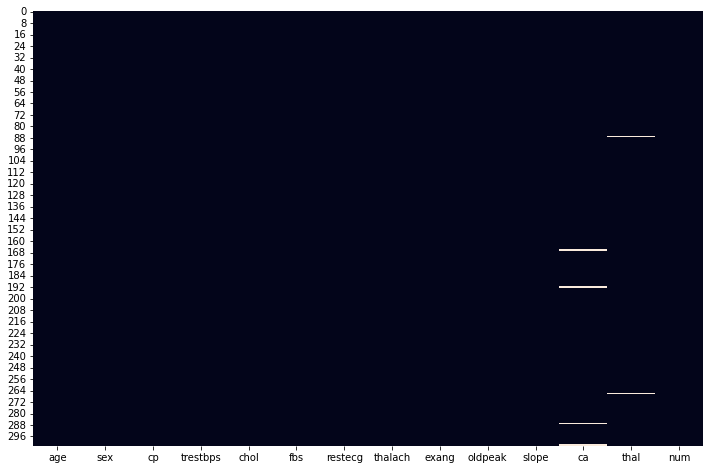

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [9]:
(df.isna().sum(axis=0)).sort_values(ascending=False)

ca          4
thal        2
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

## Analyse de fond

In [262]:
features_int = ['age', 'trestbps', 'chol', 'thalach', 'ca']
features_float = ['oldpeak']
features_object = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

### Analyse de la variable target

In [11]:
df['num'].value_counts(normalize=True)

0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: num, dtype: float64

In [50]:
def est_malade(row):
    if row['num'] >= 1:
        return 1
    else:
        return 0    

In [58]:
df['num'] = df.apply(est_malade, axis=1)

### Analyse des variables

#### Variables continues

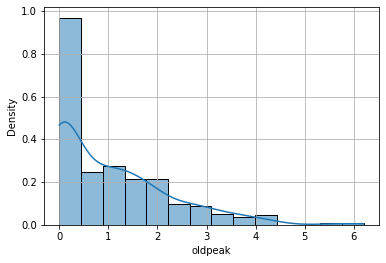

In [59]:
plt.figure()
sns.histplot(df[features_float[0]], kde = True, stat='density')
plt.grid()
plt.show()

#### Variables entières

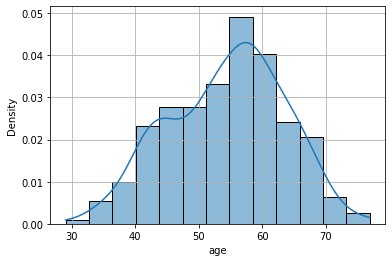

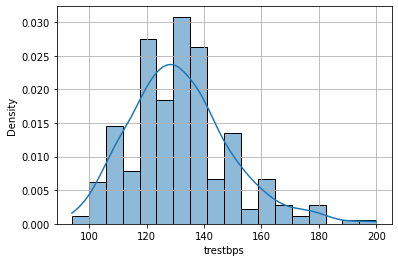

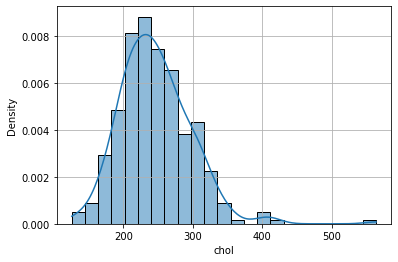

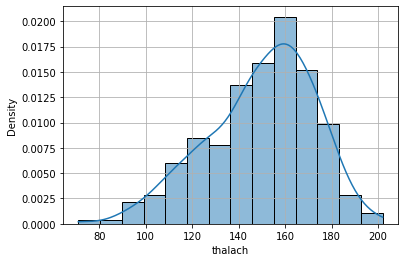

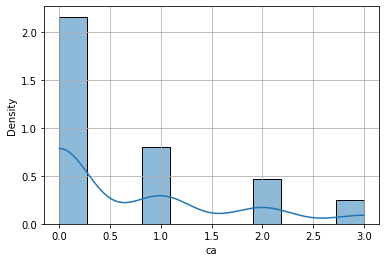

In [60]:
for col in features_int:
    plt.figure()
    sns.histplot(df[col], kde = True, stat='density')
    plt.grid()
    plt.show()

#### Variables qualitatives

In [61]:
for col in features_object:
    print(f'{col:-<50} {df[col].unique()}')  

sex----------------------------------------------- [1 0]
cp------------------------------------------------ [1 4 3 2]
fbs----------------------------------------------- [1 0]
restecg------------------------------------------- [2 0 1]
exang--------------------------------------------- [0 1]
slope--------------------------------------------- [3 2 1]
thal---------------------------------------------- [ 6.  3.  7. nan]
num----------------------------------------------- [0 1]


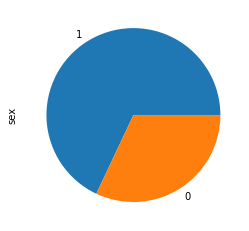

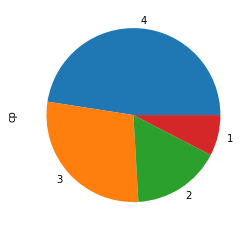

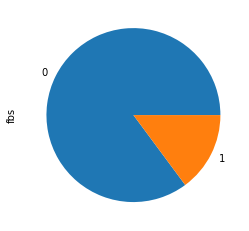

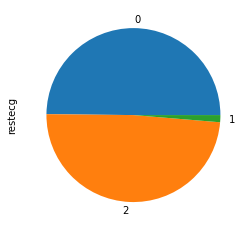

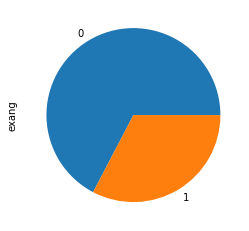

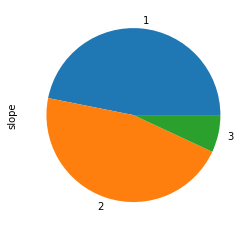

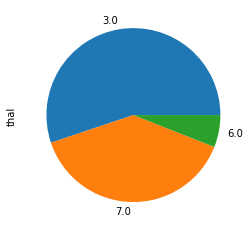

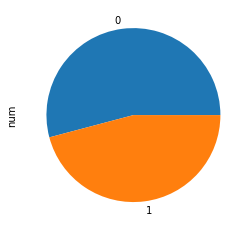

In [62]:
for col in features_object:
    plt.figure()
    df[col].value_counts().plot.pie()

### Analyse variables/target

#### Variables entières et continues

In [70]:
positive = df['num'] == 1
negative = df['num'] == 0

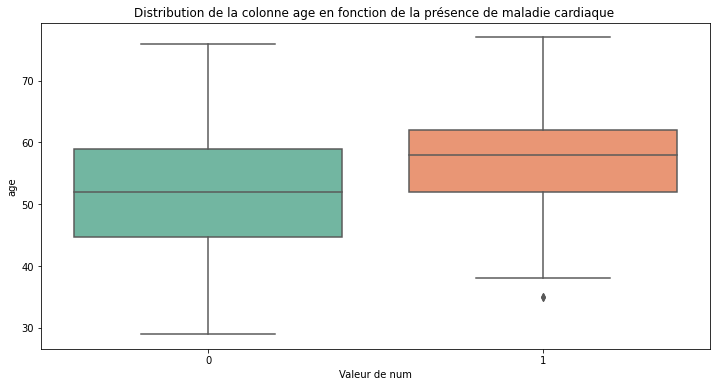

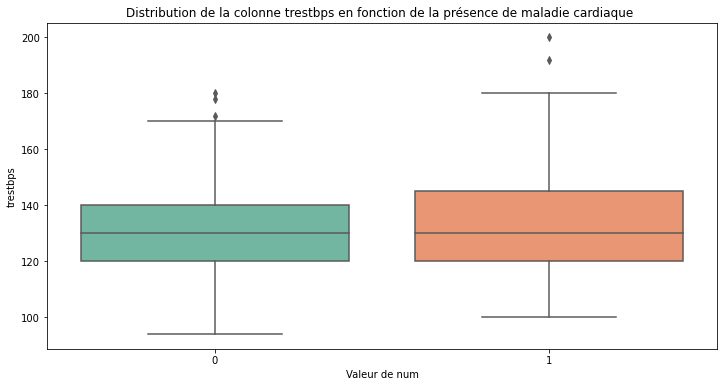

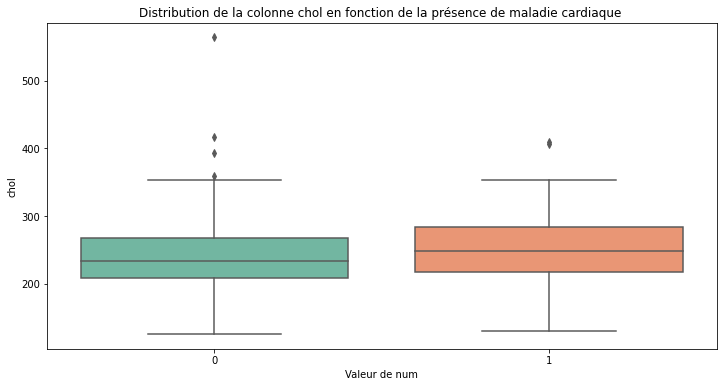

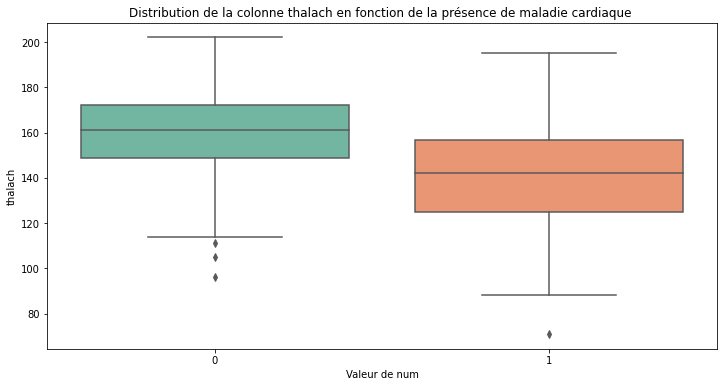

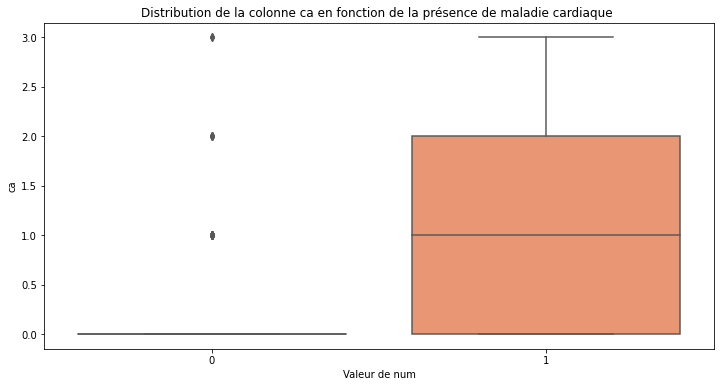

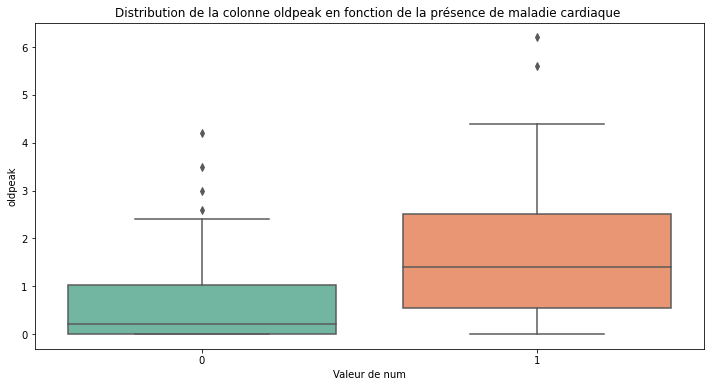

In [95]:
for col in features_int+features_float:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='num', y=col, palette='Set2')
    plt.title(f'Distribution de la colonne {col} en fonction de la présence de maladie cardiaque ')
    plt.xlabel('Valeur de num')
    plt.ylabel(col)
    plt.show()

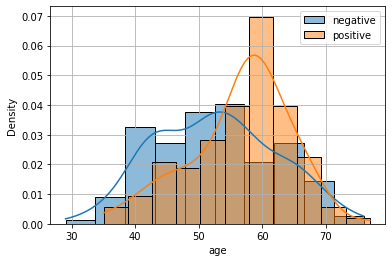

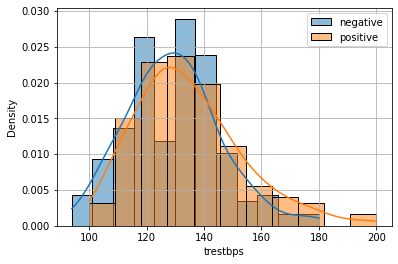

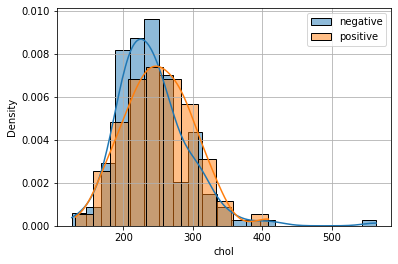

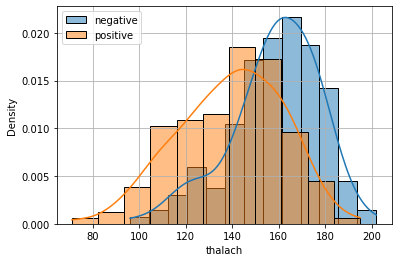

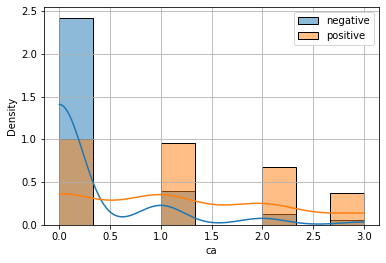

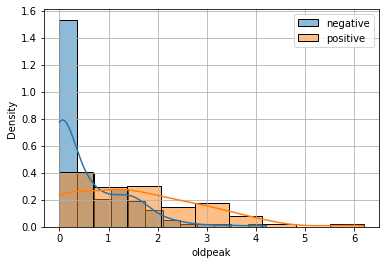

In [96]:
for col in features_int+features_float:
    plt.figure()
    sns.histplot(df[negative][col], kde = True, stat='density', label = "negative")
    sns.histplot(df[positive][col], kde = True, stat='density', label = "positive")
    plt.grid()
    plt.legend()
    plt.show()

Différence entre les classes pour les variables (continues et entières) 'age', 'chol', 'thalach', 'ca', 'oldpeak'. La distribution n'est pas toujours normale

#### Variables qualitatives

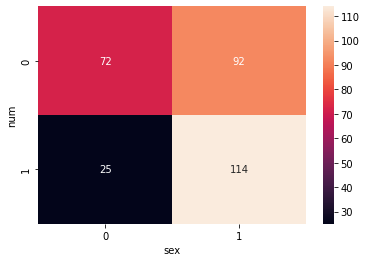

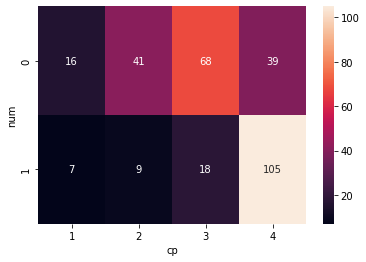

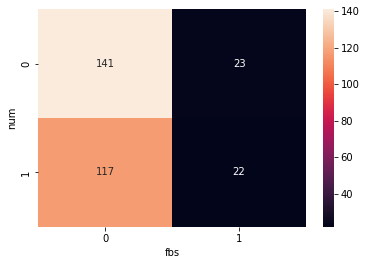

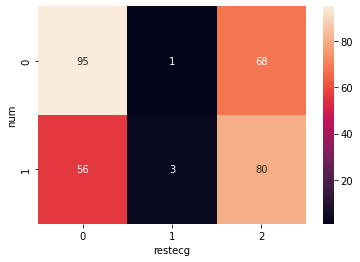

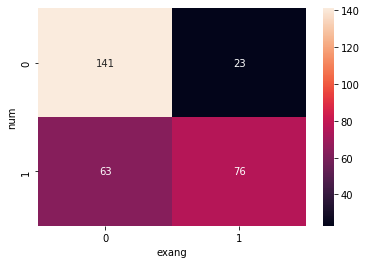

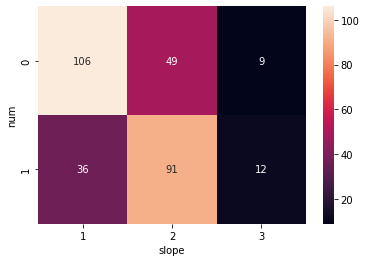

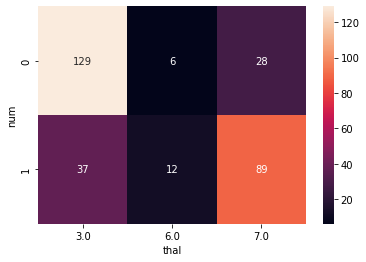

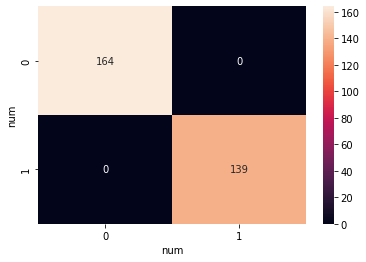

In [131]:
for col in features_object:
    plt.figure()
    sns.heatmap(pd.crosstab(df['num'], df[col]),fmt='d', annot=True)
    plt.show()

Il semble que le sexe joue un rôle important : 25 femmes ont une maladie cardique contre 114 hommes (25% des femmes contre 50% des hommes). C'est étrange, les personnes qui ont une maladie cardiaque n'ont pour la plupart pas de douleurs toraciques (114/139) tandis que les personnes saines ont pour la plupart des douleurs toraciques (125/164). Il y a autant d'individus qui ont une glycémie à jeun > 120 mg/dl dans les deux classes (23 et 22). L'électrocardiogramme détecte souvent une hypertropie ventriculaire pour les malades. Les malades ont souvent eu une angine à la suite d'un effort. La forme de la pente du segment ST est plate pour la plupart des malades. Il y a beaucoup d'individus malades qui se font détecter de zones de circulation sanguine abimées (101)

### Tests

#### Variables discrètes et continues

Le support de la variable discrète 'ca' est {1,2,3,4}

**H0 :** Les individus issus de la variable 'ca' de classe negative et de classe positive ont la même loi

**H1 :** Les variables issus de la variable 'ca' de classe negative et de classe positive ont des lois différentes

Test du $\chi^2$

In [107]:
from scipy.stats import chi2_contingency
col = 'ca'
g_neg = df[negative][col].value_counts().values.tolist()
g_pos = df[positive][col].value_counts().values.tolist()
matrice = [g_neg, g_pos]
stat, pval, d, expect = chi2_contingency(matrice)
alpha = 0.05
if pval < alpha:
    print(f'{col:-<50} H0 rejetée')
else:
    print(f'{col:-<50} 0')

ca------------------------------------------------ H0 rejetée


Pour les variables avec distribution normale : 'trestbps', 'chol', 'thalach'

In [102]:
import numpy as np
cols_test = ['trestbps', 'chol', 'thalach']
for col in cols_test:
    ech_pos = df[positive][col].values
    ech_neg = df[negative][col].values
    print(f'{col}\nVariance classe positive : {np.var(ech_pos)}\nVariance classe négative : {np.var(ech_neg)}\n')

trestbps
Variance classe positive : 349.74173179442056
Variance classe négative : 260.9923780487805

chol
Variance classe positive : 2431.3285026654935
Variance classe négative : 2840.1815511600234

thalach
Variance classe positive : 506.78184358987636
Variance classe négative : 366.35707911957167



**H0 :** La moyenne d'une variable cible des individus sains n'est pas différente de celles des individus malades

**H1 :** Elle est différente

Test de Welch à $\alpha = 5\%$ car les variances selon les classes sont différentes et que le nombre de tests indépendants est seulement de 3 (donc pas de correction sur $\alpha$)

In [138]:
from scipy.stats import ttest_ind
for col in cols_test:
    stat, pval = ttest_ind(df[positive][col], df[negative][col], equal_var= False)
    alpha = 0.05
    if pval < alpha:
        print(f'{col:-<50} H0 rejetée')
    else:
        print(f'{col:-<50} 0')

trestbps------------------------------------------ H0 rejetée
chol---------------------------------------------- 0
thalach------------------------------------------- H0 rejetée


#### Variables qualitatives

**H0 :** Les individus issus d'une variable cible de classe negative et de classe positive ont la même loi

**H1 :** Les variables issus d'une variable cible de classe negative et de classe positive ont des lois différentes

Test du $\chi^2$

Une rapide analyse montre que pour la variable 'restecg' il y a des valeurs attendues inférieures à 5 donc on décide de fusionner les modalités 1 et 2 dans ce cas précis

In [198]:
for col in features_object[:-1]:
    g_neg = df[negative][col].value_counts().values.tolist()
    g_pos = df[positive][col].value_counts().values.tolist()
    if col == 'restecg':
        g_neg = df[positive][col].value_counts().get([0,2])+(0,df[positive][col].value_counts().get(1))
        g_pos = df[negative][col].value_counts().get([0,2])+(0,df[negative][col].value_counts().get(1))
    matrice = [g_neg, g_pos]
    stat, pval, d, expect = chi2_contingency(matrice)
    alpha = 0.05
    if pval < alpha:
        print(f'{col:-<50} H0 rejetée')
    else:
        print(f'{col:-<50} 0')

sex----------------------------------------------- H0 rejetée
cp------------------------------------------------ H0 rejetée
fbs----------------------------------------------- 0
restecg------------------------------------------- H0 rejetée
exang--------------------------------------------- H0 rejetée
slope--------------------------------------------- 0
thal---------------------------------------------- H0 rejetée


Les variables qui ont des lois significativement différentes selon que le patient est malade ou non sont **ca, sex, trestbps, thalach, cp, restecg, exang, thal**

### Analyse appronfondie des NaN

In [214]:
print(df[negative]['ca'].mean(), df[positive]['ca'].mean())

0.2732919254658385 1.1376811594202898


Imputer la classe négative avec 0 et la classe positive avec 1

In [215]:
print(df[negative]['thal'].mean(), df[positive]['thal'].mean())

3.7975460122699385 5.840579710144928


Imputer la classe négative avec 3 et la classe positive avec 7

Attention au data leaking

### Relations variables/variables

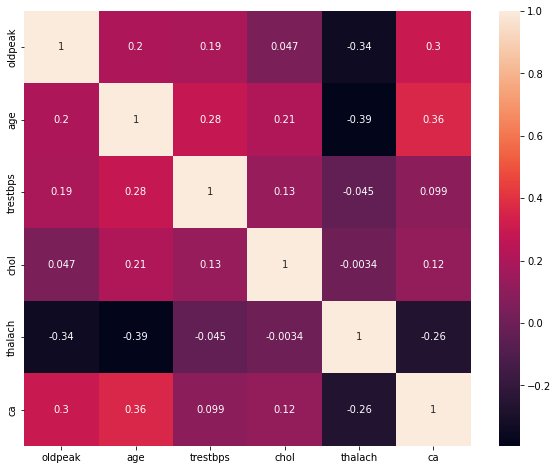

In [899]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features_float+features_int].corr(), annot=True)
plt.show()

Pas vraiment de corrélation entre les variables

# 2. Pre-processing des données

In [599]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline

In [1040]:
df_pp = df.copy()

In [1041]:
df_pp = df_pp[features_int + features_float + features_object]
df_pp

,age,trestbps,chol,thalach,ca,oldpeak,sex,cp,fbs,restecg,exang,slope,thal,num
0,63,145,233,150,0.0,2.3,1,1,1,2,0,3,6.0,0
1,67,160,286,108,3.0,1.5,1,4,0,2,1,2,3.0,1
2,67,120,229,129,2.0,2.6,1,4,0,2,1,2,7.0,1
3,37,130,250,187,0.0,3.5,1,3,0,0,0,3,3.0,0
4,41,130,204,172,0.0,1.4,0,2,0,2,0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,0.0,1.2,1,1,0,0,0,2,7.0,1
299,68,144,193,141,2.0,3.4,1,4,1,0,0,2,7.0,1
300,57,130,131,115,1.0,1.2,1,4,0,0,1,2,7.0,1
301,57,130,236,174,1.0,0.0,0,2,0,2,0,2,3.0,1


In [1042]:
training_set, testing_set = train_test_split(df_pp, test_size = 0.2, random_state = 0)

In [1043]:
print(training_set['num'].value_counts())
print(testing_set['num'].value_counts())

0    129
1    113
Name: num, dtype: int64
0    35
1    26
Name: num, dtype: int64


In [1044]:
training_set

,age,trestbps,chol,thalach,ca,oldpeak,sex,cp,fbs,restecg,exang,slope,thal,num
74,44,110,197,177,1.0,0.0,1,4,0,2,0,1,3.0,1
153,55,160,289,145,1.0,0.8,1,4,0,2,1,2,7.0,1
64,54,120,188,113,1.0,1.4,1,4,0,0,0,2,7.0,1
296,59,164,176,90,2.0,1.0,1,4,1,2,0,2,6.0,1
287,58,125,220,144,NaN,0.4,1,2,0,0,0,2,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58,146,218,105,1.0,2.0,1,4,0,0,0,2,7.0,1
192,43,132,247,143,NaN,0.1,1,4,1,2,1,2,7.0,1
117,35,138,183,182,0.0,1.4,0,4,0,0,0,1,3.0,0
47,50,150,243,128,0.0,2.6,1,4,0,2,0,2,7.0,1


### Imputation

In [1045]:
def imputation(df_train, df_test):
    # Données d'entrainement
    ca_pos = df_train[df_train['num'] == 1]['ca'].mode()[0]
    ca_neg = df_train[df_train['num'] == 0]['ca'].mode()[0]
    df_train.loc[df_train['num'] == 1, 'ca'] = df_train.loc[df_train['num'] == 1, 'ca'].fillna(ca_pos)
    df_train.loc[df_train['num'] == 0, 'ca'] = df_train.loc[df_train['num'] == 0, 'ca'].fillna(ca_neg)
    thal_pos = df_train[df_train['num'] == 1]['thal'].mode()[0]
    thal_neg = df_train[df_train['num'] == 0]['thal'].mode()[0]
    df_train.loc[df_train['num'] == 1, 'thal'] = df_train.loc[df_train['num'] == 1, 'thal'].fillna(thal_pos)
    df_train.loc[df_train['num'] == 0, 'thal'] = df_train.loc[df_train['num'] == 0, 'thal'].fillna(thal_neg)
    
    # Données de test
    df_test.loc[df_test['num'] == 1, 'ca'] = df_test.loc[df_test['num'] == 1, 'ca'].fillna(ca_pos)
    df_test.loc[df_test['num'] == 0, 'ca'] = df_test.loc[df_test['num'] == 0, 'ca'].fillna(ca_neg)
    df_test.loc[df_test['num'] == 1, 'thal'] = df_test.loc[df_test['num'] == 1, 'thal'].fillna(thal_pos)
    df_test.loc[df_test['num'] == 0, 'thal'] = df_test.loc[df_test['num'] == 0, 'thal'].fillna(thal_neg)
    return(df_train, df_test)

### Encodage

In [1046]:
def encodage(df_train, df_test):
    df_train = pd.get_dummies(df_train, columns=features_object[:-1], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=features_object[:-1], drop_first=True)
    df_test = df_test.reindex(columns=df_train.columns, fill_value=0)
    return(df_train, df_test)

### Normalisation

In [1047]:
def normalisation(df_train, df_test):
    scaler = StandardScaler()
    df_train[features_float+features_int] = scaler.fit_transform(df_train[features_float+features_int])
    df_test[features_float+features_int] = scaler.transform(df_test[features_float+features_int])
    return(df_train, df_test)

### Pre-processing

In [1048]:
def preprocessing(df_train, df_test):
    df_train, df_test = imputation(df_train, df_test)
    df_train, df_test = encodage(df_train, df_test)
    df_train, df_test = normalisation(df_train, df_test)
    X_train = df_train.drop('num', axis = 1)
    Y_train = df_train['num']
    X_test = df_test.drop('num', axis = 1)
    Y_test = df_test['num']
    return(X_train, Y_train, X_test, Y_test)

In [1049]:
X_train, Y_train, X_test, Y_test = preprocessing(training_set, testing_set)

In [1050]:
X_train

,age,trestbps,chol,thalach,ca,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,thal_6.0,thal_7.0
74,-1.131852,-1.278857,-0.956978,1.243174,0.328889,-0.898143,1,0,0,1,0,0,1,0,0,0,0,0
153,0.072862,1.576683,0.878810,-0.194356,0.328889,-0.230912,1,0,0,1,0,0,1,1,1,0,0,1
64,-0.036657,-0.707749,-1.136566,-1.631886,0.328889,0.269512,1,0,0,1,0,0,0,0,1,0,0,1
296,0.510940,1.805126,-1.376016,-2.665111,1.362539,-0.064104,1,0,0,1,1,0,1,0,1,0,1,0
287,0.401421,-0.422195,-0.498031,-0.239279,-0.704761,-0.564527,1,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.401421,0.777132,-0.537939,-1.991269,0.328889,0.769935,1,0,0,1,0,0,0,0,1,0,0,1
192,-1.241372,-0.022420,0.040733,-0.284202,-0.704761,-0.814739,1,0,0,1,1,0,1,1,1,0,0,1
117,-2.117527,0.320245,-1.236337,1.467788,-0.704761,0.269512,0,0,0,1,0,0,0,0,0,0,0,0
47,-0.474735,1.005575,-0.039084,-0.958044,-0.704761,1.270359,1,0,0,1,0,0,1,0,1,0,0,1


In [1051]:
X_test

,age,trestbps,chol,thalach,ca,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,thal_6.0,thal_7.0
225,-2.227047,-0.821971,-0.697573,1.917016,-0.704761,-0.314316,0,1,0,0,0,0,0,0,0,0,0,0
152,1.387096,-0.993303,6.366219,0.479486,-0.704761,0.436320,0,0,1,0,0,0,1,0,1,0,0,1
228,-0.036657,-1.278857,-0.777390,-1.856500,0.328889,-0.898143,1,0,0,1,0,0,1,1,1,0,0,0
201,1.058537,2.718899,1.597162,0.209949,-0.704761,-0.898143,0,0,0,1,0,0,0,1,0,0,0,0
52,-1.131852,-1.164636,0.898764,0.165026,0.328889,-0.898143,1,0,0,1,0,0,1,0,0,0,0,0
245,1.387096,-0.707749,-0.158809,-3.518644,-0.704761,-0.064104,1,0,0,1,0,0,0,0,1,0,0,0
175,0.291901,1.119797,0.579497,-2.754956,0.328889,0.102704,1,0,0,1,0,0,0,1,1,0,0,1
168,-2.117527,-0.365084,0.739130,0.299795,-0.704761,-0.898143,1,0,0,1,0,0,1,1,0,0,0,1
223,-0.146177,-0.536417,0.739130,-2.440497,1.362539,0.769935,1,0,0,1,0,0,0,1,1,0,0,1
217,-0.912813,0.320245,-0.039084,0.120104,-0.704761,-0.898143,0,0,0,1,0,0,1,1,1,0,0,0


### Premier modèle

In [1052]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix

In [1053]:
def evaluation(model, x_train, y_train):    
    N, train_scores, test_scores = learning_curve(clf, x_train, y_train, 
                                                  train_sizes=np.linspace(0.1,1,10), cv=5, scoring='f1')
    plt.figure(figsize=(12,8))
    plt.plot(N, train_scores.mean(axis=1), label='Train score')
    plt.plot(N,test_scores.mean(axis=1), label='Validation score')
    plt.xlabel('N')
    plt.ylabel('f1')
    plt.grid()
    plt.legend()
    plt.show()

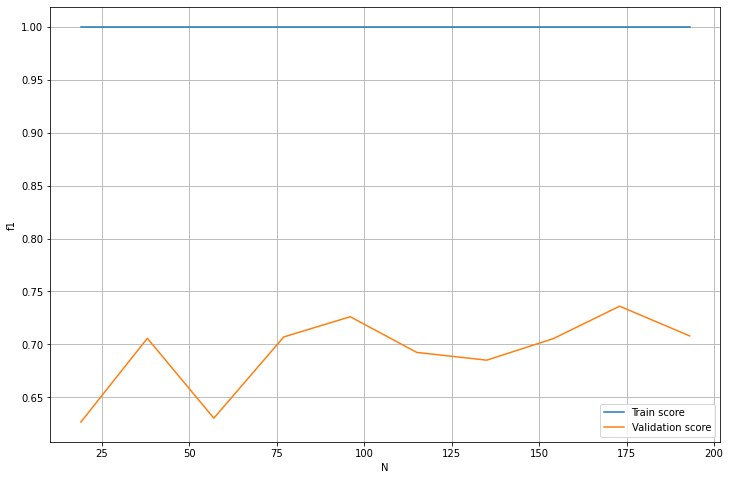

In [1054]:
model = DecisionTreeClassifier()
evaluation(model, X_train, Y_train)

In [1055]:
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.74      0.65      0.69        26

    accuracy                           0.75        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.75      0.75        61



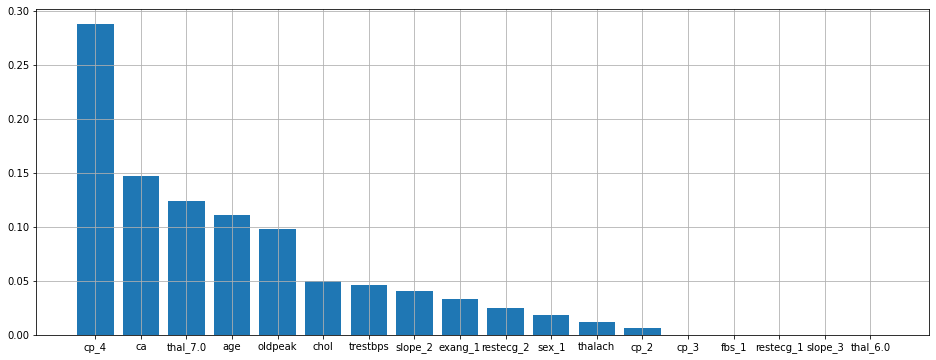

In [1056]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(16,6))
plt.bar(feature_importance.index, feature_importance.values)
plt.grid()
plt.show()

# 3. Modélisation

## Entrainement de modèles

### Régression logistique

In [1057]:
from sklearn.linear_model import LogisticRegression

In [1058]:
model = LogisticRegression(solver='liblinear')

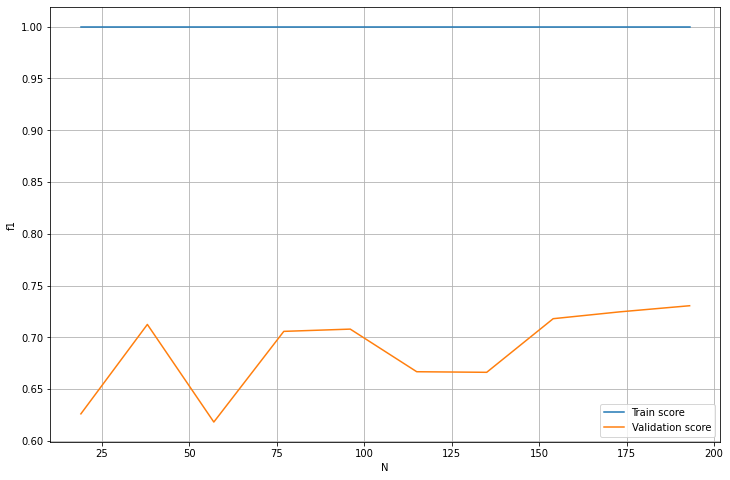

In [1059]:
evaluation(model, X_train, Y_train)

In [1060]:
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.71      0.65      0.68        26

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



#### Optimisation

In [1061]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [1062]:
kf = KFold(n_splits=5, shuffle=True, random_state = 0)

In [1063]:
model = LogisticRegression(solver='liblinear')
parameters = {'C' : [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,2,5,10],
          'penalty' : ['l1', 'l2']}
GSCV = GridSearchCV(model, parameters, cv=kf)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)

{'C': 0.8, 'penalty': 'l2'}


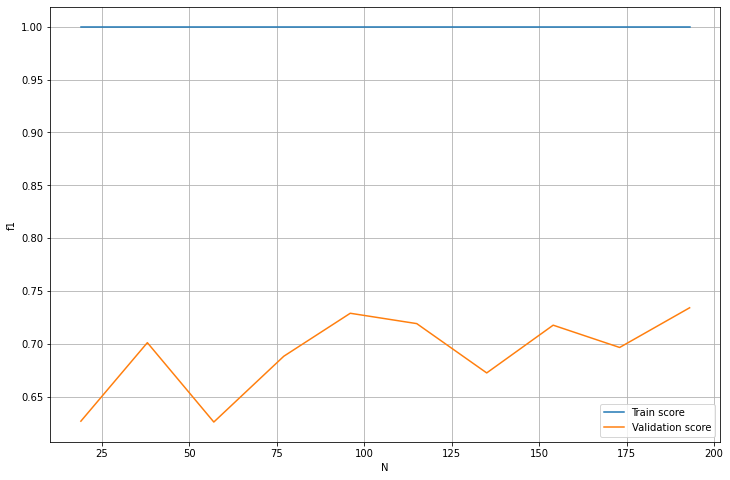

In [1064]:
model_lr = GSCV.best_estimator_
evaluation(model_lr, X_train, Y_train)

In [1065]:
model_lr.fit(X_train, Y_train)
preds = model_lr.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.71      0.65      0.68        26

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



#### Odds ratios

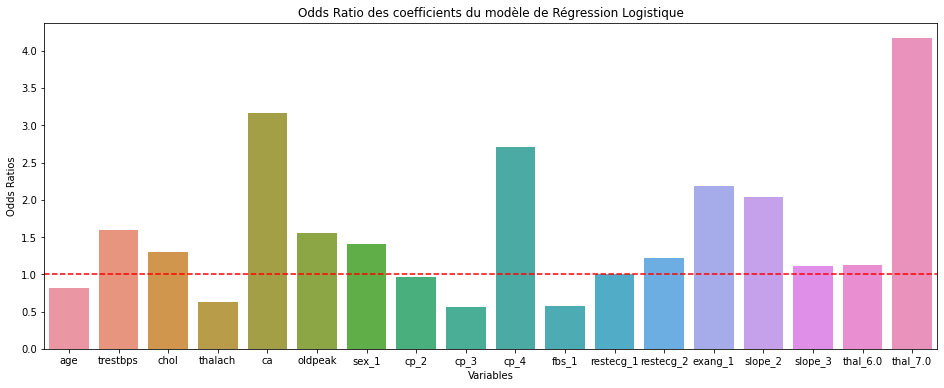

In [1066]:
odds_ratios = np.exp(model_lr.coef_[0])
plt.figure(figsize=(16, 6))
sns.barplot(x=X_test.columns, y=odds_ratios)
plt.xlabel('Variables')
plt.ylabel('Odds Ratios')
plt.title('Odds Ratio des coefficients du modèle de Régression Logistique')
plt.axhline(1, color='red', linestyle='--')
plt.show()

Les variables 'cp_2', 'restecg_1', 'slope_3' et 'thal_6.0' n'influent pas sur la prise de décision (surtout restecg_1)

## Post-processing

In [1067]:
def postprocessing(df_train, df_test):
    df_train = df_train.drop(['restecg_1'], axis=1)
    df_test = df_test.drop(['restecg_1'], axis=1)
    return(df_train, df_test)

In [1068]:
X_train, X_test = postprocessing(X_train, X_test)

### Forêts aléatoires

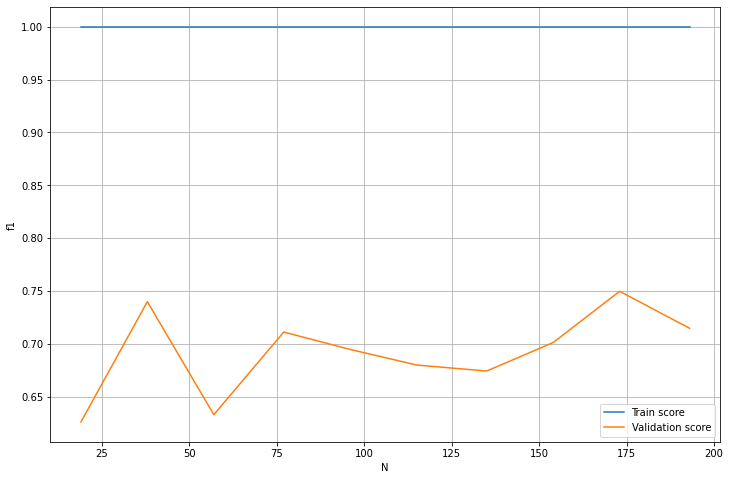

In [1069]:
model = RandomForestClassifier(n_estimators=50, random_state=0)
evaluation(model, X_train, Y_train)

In [1070]:
model.fit(X_train, Y_train)
preds = model.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.79      0.58      0.67        26

    accuracy                           0.75        61
   macro avg       0.76      0.73      0.74        61
weighted avg       0.76      0.75      0.75        61



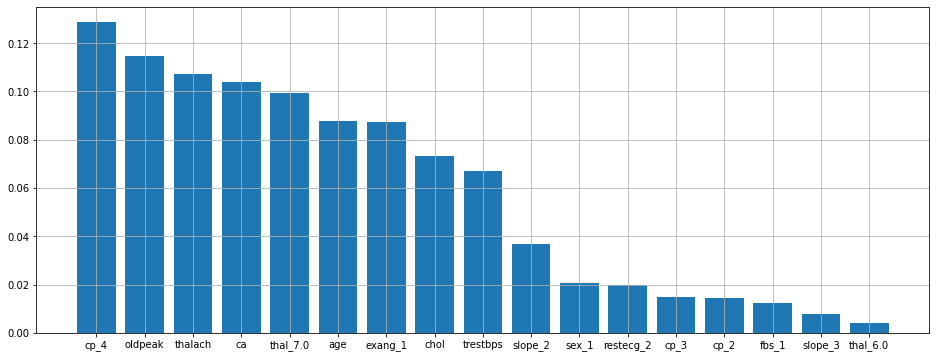

In [1071]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(16,6))
plt.bar(feature_importance.index, feature_importance.values)
plt.grid()
plt.show()

#### Optimisation

In [1072]:
model = RandomForestClassifier(random_state=0)

parameters = {'n_estimators' : [50,100,200],
          'max_depth' : [i for i in range(4,31)]}
GSCV = GridSearchCV(model, parameters, cv=kf)
GSCV.fit(X_train, Y_train)
print(GSCV.best_params_)

{'max_depth': 4, 'n_estimators': 200}


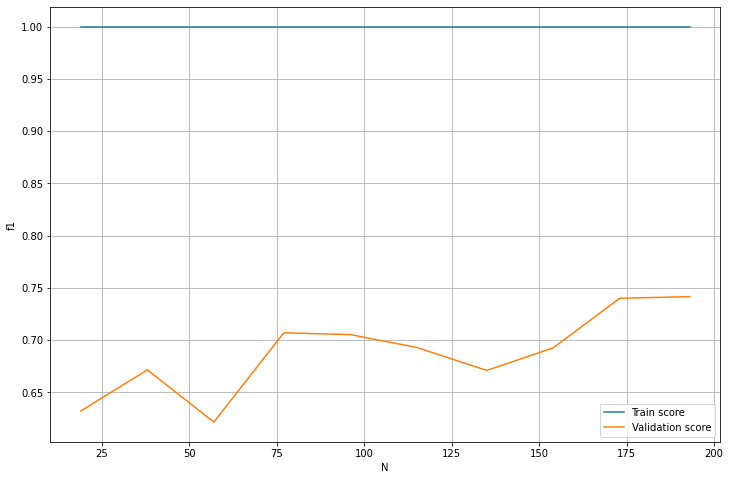

In [1073]:
model_rf = GSCV.best_estimator_
evaluation(model_rf, X_train, Y_train)

In [1074]:
model_rf.fit(X_train, Y_train)
preds = model_rf.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.84      0.62      0.71        26

    accuracy                           0.79        61
   macro avg       0.80      0.76      0.77        61
weighted avg       0.80      0.79      0.78        61



### SVC

In [1075]:
from sklearn.svm import SVC

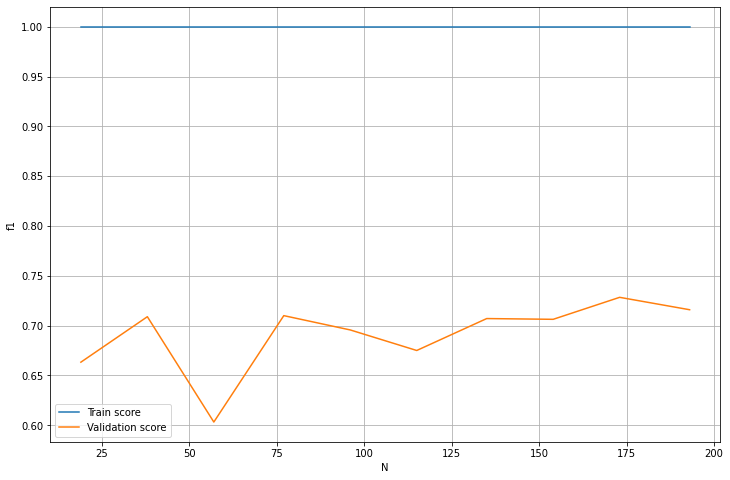

In [1076]:
model = SVC(kernel='rbf', random_state=0)
evaluation(model, X_train, Y_train)

#### Optimisation

In [1077]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [1078]:
model = SVC(random_state=0, probability=True)
parameters = {
    'C': uniform(0.01,100),  # Valeurs de C entre 0.001 et 1000
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux
    'gamma': ['scale', 'auto']   # Valeurs de gamma
}
random_search = RandomizedSearchCV(model, param_distributions=parameters, n_iter=200,
                                   cv=kf, verbose=1, random_state=0, scoring='f1')

# Ajuster le modèle
random_search.fit(X_train, Y_train)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 4.575964198897843, 'gamma': 'scale', 'kernel': 'linear'}
0.825086765086765


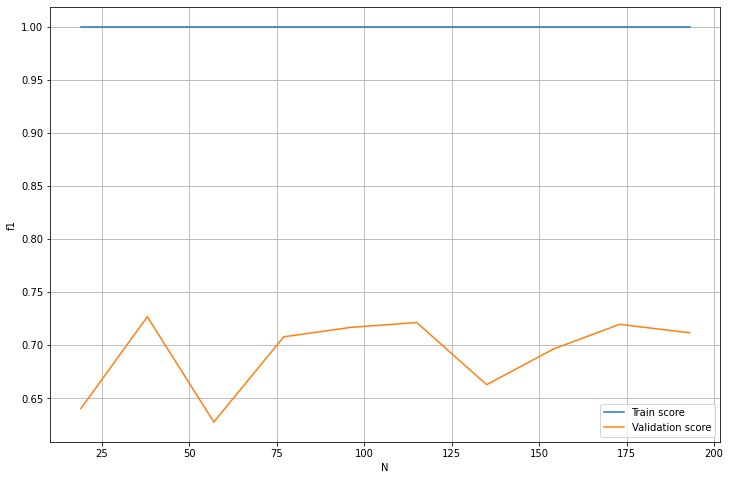

In [1079]:
model_svc = random_search.best_estimator_
evaluation(model_svc, X_train, Y_train)

In [1080]:
model_svc.fit(X_train, Y_train)
preds = model_svc.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.76      0.62      0.68        26

    accuracy                           0.75        61
   macro avg       0.76      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



### MLP

In [1081]:
from sklearn.neural_network import MLPClassifier

In [1082]:
model = MLPClassifier(max_iter=2000, random_state=0)

parameters = {
    'hidden_layer_sizes': [(32,), (32,8), (32,16), (16, 8), (16, 16), (16,), (48,8), (48,16),(48,32)], 
    'activation': ['logistic', 'tanh', 'relu'],         
    'solver': ['adam', 'lbfgs'],                 
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)
print(random_search.best_params_)
print(random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 54 is smaller than n_iter=200. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'solver': 'adam', 'hidden_layer_sizes': (16,), 'activation': 'tanh'}
0.8595013230643461


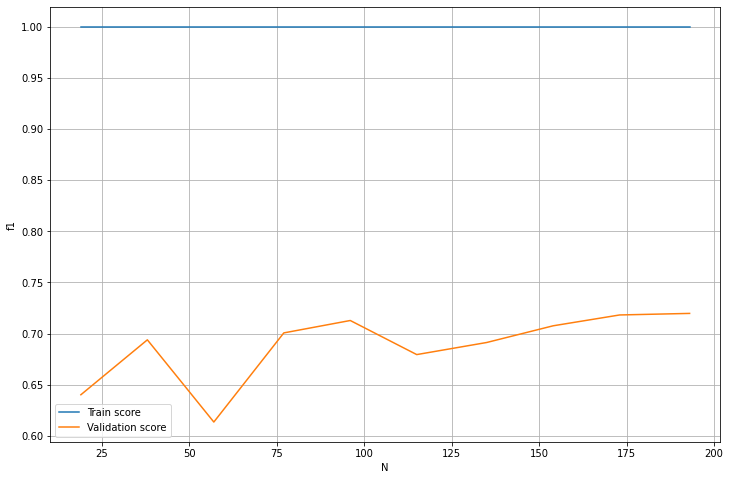

In [1083]:
model_mlp = random_search.best_estimator_
evaluation(model_mlp, X_train, Y_train)

In [1084]:
model_mlp.fit(X_train, Y_train)
preds = model_mlp.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.71      0.77      0.74        26

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### XGBoost

In [1085]:
import xgboost as xgb

In [1086]:
model = xgb.XGBClassifier(random_state=0)

param_distributions = { 
    'n_estimators': randint(30, 100),               
    'learning_rate': uniform(0.01, 0.2),           
    'max_depth': randint(2, 10),                     
    'subsample': uniform(0.8, 0.15),               
    'colsample_bytree': uniform(0.8, 0.15)}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'colsample_bytree': 0.8575193337552423, 'learning_rate': 0.15983396743054495, 'max_depth': 2, 'n_estimators': 84, 'subsample': 0.8154295038040158}
0.8275378368401624


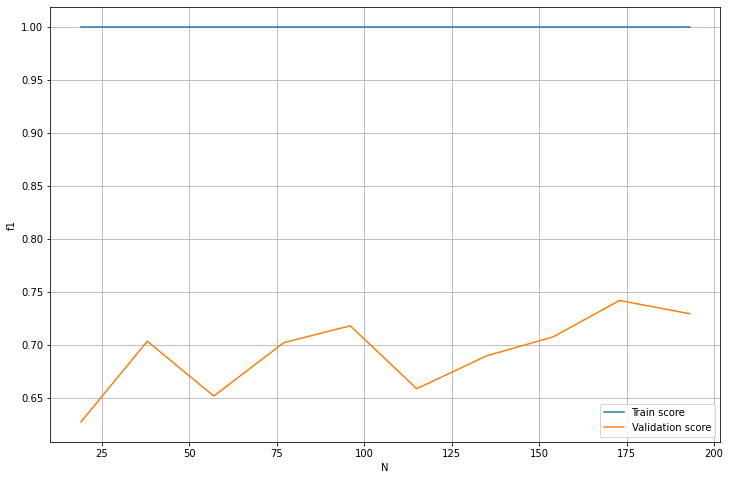

In [1087]:
model_xgb = random_search.best_estimator_
evaluation(model_xgb, X_train, Y_train)

In [1088]:
model_xgb.fit(X_train, Y_train)
preds = model_xgb.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.77      0.65      0.71        26

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



### Stacking

In [1099]:
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression(C= 1, solver = 'liblinear')

model_stacking = StackingClassifier(
    estimators=[('mlp', model_mlp), ('xgb', model_xgb), ('rf', model_rf)],
    final_estimator=meta_model,
    cv=5)

model_stacking.fit(X_train, Y_train)

y_pred = model_stacking.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.76      0.73      0.75        26

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



## Courbes ROC

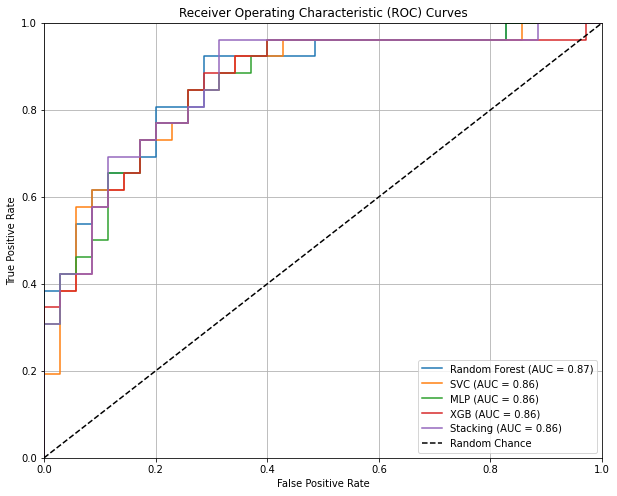

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        35
           1       0.71      0.92      0.80        26

    accuracy                           0.80        61
   macro avg       0.82      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61


Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61


Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79

In [1100]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, classification_report

# Initialiser les modèles
models = {
    #'Logistic Regression': model_lr,
    'Random Forest': model_rf,
    'SVC': model_svc,
    'MLP': model_mlp,
    'XGB': model_xgb,
    'Stacking': model_stacking
}

# Dictionnaire pour stocker les courbes ROC et les seuils
roc_curves = {}
classification_reports = {}

# Entraîner les modèles et calculer les courbes ROC
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  # Obtenir les probabilités pour la classe positive
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)  # Calculer la courbe ROC
    roc_auc = auc(fpr, tpr)  # Calculer l'aire sous la courbe
    
    # Calculer le meilleur seuil (maximisation du score F1)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
    best_threshold = thresholds[np.argmax(f1_scores)]
    
    # Prédictions basées sur le meilleur seuil
    y_pred = (y_prob >= best_threshold).astype(int)
    
    # Rapport de classification
    classification_reports[model_name] = classification_report(Y_test, y_pred)
    
    # Stocker les résultats
    roc_curves[model_name] = (fpr, tpr, roc_auc, best_threshold)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc, _) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Tracer la diagonale (chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Ajouter des détails au graphique
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Afficher les rapports de classification
for model_name, report in classification_reports.items():
    print(f'Classification Report for {model_name}:\n{report}\n')


Le modèle de Stacking s'avère être le plus performant **(f1 = 81%, recall = 96% et accuracy = 80%)**. Tous les modèles sont bons (AUC >= 0.86), les courbes sont similaires ce qui indique que les modèles ont des performances comparables et que le choix du modèle n'est pas vraiment significatif pour traiter ce jeu de données.

#  **L'objectif f1>80% a été accompli**